## Treinando e salvando modelos de ML


In [5]:
# Passo 1: importando os pacotes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Passo 2a: importando os dados

x, y = load_digits(return_X_y=True)

print('Dimensões x:', x.shape)
print('Dimensões y:', y.shape)


Dimensões x: (1797, 64)
Dimensões y: (1797,)


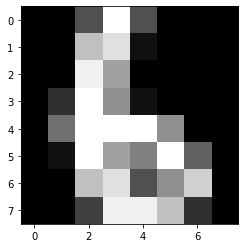

In [6]:
# Visualizando alguns digitos
sample = np.random.randint(0, len(x))
img = x[sample].reshape((8,8)).astype(np.uint8)

imgplot = plt.imshow(img, cmap="gray")

In [7]:
# Passo 2b: dividindo os dados em conjunto de treino e conjunto de teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
# Passo 2c: Normalizando os dados

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [9]:
# Passo 3: Criando e treinando o modelo

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [10]:
# Passo 4: Avaliando o modelo

# normalizando as amostras do conjunto de teste:
x_test = scaler.transform(x_test)

# em seguida predizemos o conjunto de teste:
y_pred = model.predict(x_test)

In [11]:
print('Acurácia sobre conjunto de treinamento = ',model.score(x_train, y_train))
print('Acurácia sobre conjunto de teste = ',model.score(x_test, y_test))

Acurácia sobre conjunto de treinamento =  0.964509394572025
Acurácia sobre conjunto de teste =  0.9416666666666667


In [14]:
# salvando o modelo em formato pickle nativo

import pickle

# criando um objeto iterador com a permissão de leitura e gravação - model_pkl.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)


In [19]:
# carrega o modelo salvo
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
    
# usa o modelo carregado para fazer as predições (sanity check)
loaded_new_pred = model_loaded.predict(x_test)
print(loaded_new_pred.shape)

(360,)


In [20]:
# observação: conseguimos salvar modelos em formato .pkl (pickle), .npy (com numpy.save()), .pth (pytorch)

# não é possível salvar modelos mais complexos em .csv de forma trivial, 
# haja visto que cada conjunto de parâmetros pode representar uma aba da planilha (contra-producente 
# para salvar e carregar)